# 

# Results of the pipeline

In [1]:
import pickle
from autoembedding.results_manager import results2table

results = pickle.load(open("./results/phylogenetic_results_topo.pkl", "rb"))
r = results2table(
    results, 
    embedders= [
        # "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    preferred_metric_gt="euclidean", 
    preferred_method_gt="average",
    preferred_edge_weight="method_1",
    preferred_annotation="taxonomy"
)
# r.to_latex("./latex_output.tex")
r

seqvec     prose  alphafold       esm
combiner dimensional PCA                                         
pca      10               0.229532  0.252664   0.126053  0.177885
         50               0.276391  0.255782   0.138783  0.273662
         all              0.296438  0.255735   0.139059  0.273793
average  10               0.224520  0.325737   0.127148  0.212842
         50               0.316378  0.329970   0.137755  0.332728
         all              0.339593  0.330083   0.134316  0.361265
sum      10               0.123466  0.276827   0.164567  0.119100
         50               0.102596  0.274174   0.133303  0.105187
         all              0.086596  0.274727   0.132723  0.102661
max      10               0.187658  0.352926   0.089598  0.325768
         50               0.265340  0.384711   0.111782  0.413403
         all              0.160652  0.391858   0.095958  0.439673

## Scores

257


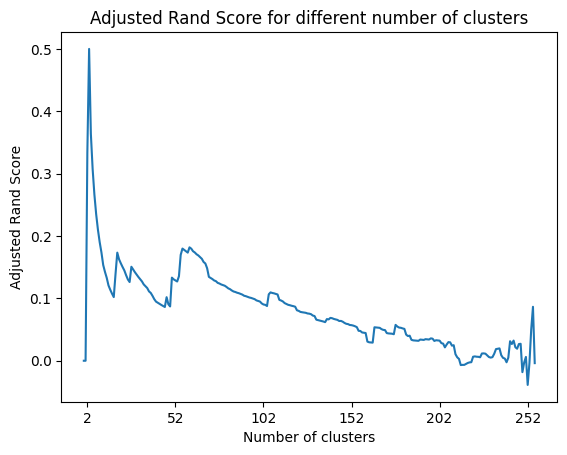

In [45]:
import matplotlib.pyplot as plt
import numpy as np

results = pickle.load(open("./results/phylogenetic_results_batterio.pkl", "rb"))
scores = results[0][0]['adjusted_rand_scores']

# reverse the list, since the first element represent each point in its own cluster
scores = scores[::-1]


plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")
plt.xticks(range(2, len(scores)+2, 50))

print(len(scores))
plt.plot(scores)


In [44]:
print(np.median(scores))
print(np.mean(scores))

0.24102991225434311
0.22953219562793706
